# SPAM OR NO SPAM PREDICTION- NaiveBayes Algorithm

## Defining the question

Given the data, we are to predict whether an email is spam or not by building a Naive Bayes Model.

## Metric for success

Our analysis will be considered successful if we are able to develop a Naive Bayes model that can accurately predict whether or not an email is spam.

## Understanding the context
The spam dataset's final column indicates whether the e-mail was considered spam (1) or not (0). The majority of the attributes indicate whether a specific word or character appeared frequently in the e-mail.

## Experimental design

- Data Preparation
- Exploratory Data Analysis
- Data Preprocessing
- Building our models: Gaussian,Multinomial
- Challenging the solutions
- Conclusion and Recommendations

## Reading the data

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Set global parameters
%matplotlib inline
sns.set()
plt.rcParams['figure.figsize'] = (10.0, 8.0)
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Loading our datasets
with open('/content/spambase (1).names') as file:
  names = file.read()
  print(names)

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [ ]:
# Lets get our column names and enter them in a list from the data above
columns = ['word_freq_make',
          'word_freq_address',      
          'word_freq_all',          
          'word_freq_3d',          
          'word_freq_our',          
          'word_freq_over',         
          'word_freq_remove',       
          'word_freq_internet',     
          'word_freq_order',        
          'word_freq_mail',         
          'word_freq_receive',      
          'word_freq_will',         
          'word_freq_people',       
          'word_freq_report',       
          'word_freq_addresses',    
          'word_freq_free',         
          'word_freq_business',     
          'word_freq_email',        
          'word_freq_you',          
          'word_freq_credit',       
          'word_freq_your',         
          'word_freq_font',         
          'word_freq_000',          
          'word_freq_money',        
          'word_freq_hp',           
          'word_freq_hpl',          
          'word_freq_george',       
          'word_freq_650',          
          'word_freq_lab',          
          'word_freq_labs',         
          'word_freq_telnet',       
          'word_freq_857',          
          'word_freq_data',         
          'word_freq_415',          
          'word_freq_85',           
          'word_freq_technology',   
          'word_freq_1999',         
          'word_freq_parts',        
          'word_freq_pm',           
          'word_freq_direct',       
          'word_freq_cs',           
          'word_freq_meeting',      
          'word_freq_original',     
          'word_freq_project',      
          'word_freq_re',           
          'word_freq_edu',          
          'word_freq_table',        
          'word_freq_conference',   
          'char_freq_;',            
          'char_freq_(',            
          'char_freq_[',            
          'char_freq_!',            
          'char_freq_$',            
          'char_freq_#',            
          'capital_run_length_average', 
          'capital_run_length_longest', 
          'capital_run_length_total',
          'spam']

In [ ]:
# Loading email data
email = pd.read_csv('/content/spambase (1).data', names=columns)

## Checking the data

In [ ]:
# Preview the top of our data
email.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# preview the bottom of our data
email.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
# checking the shape of our data
email.shape

(4601, 58)

Our data has 4601 observations and 58 columns

In [ ]:
# checking the dtypes of our columns
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

## Tidying the data

In [ ]:
# checking for null values
email.isnull().sum().sum()

0

There are no null values within our dataset.

In [ ]:
# check for duplicates
email.duplicated().sum()

391

In [ ]:
# Dropping our duplicates
email.drop_duplicates(inplace=True)

- The columns are too numerous, and we must employ reduction techniques to reduce the data dimension.
- We'll skip straight to modeling because making charts won't help us analyze the columns.
- We will plot the target variable to check its proportion.

## Exploratory Analysis

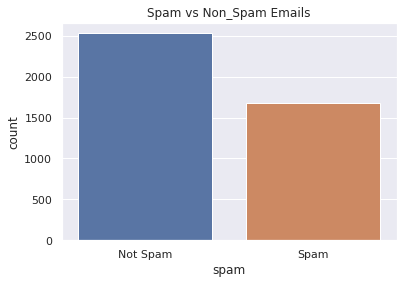

In [ ]:
# Plotting the target variable 

sns.countplot(email.spam)
plt.title('Spam vs Non_Spam Emails')
plt.xticks([0,1],['Not Spam', 'Spam'])
plt.show()

~ 2500 of the emails were not spam and ~1700 were spam emails.

In [ ]:
# check proportion of target variable in %
email.spam.value_counts(normalize=True)*100

0    60.118765
1    39.881235
Name: spam, dtype: float64

60.1% of our emails are normal(**not spam**) and 39.9% are **spam** emails.

Our dataset is imbalanced. We will figure out what to do before splitting the data.

## Implement the solution

### **Gaussian Naive Bayes Classifier**

***80/20 SPLIT***

In [17]:
# creating a copy of our dataset
df = email.copy(deep = True)
# getting our independent and dependent variables
X = df.drop(columns = ['spam'], axis=1)
y = df.spam

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
# 
# Training our model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("The model accuracy is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The model accuracy is 0.8206650831353919
[[357 138]
 [ 13 334]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.83       495
           1       0.71      0.96      0.82       347

    accuracy                           0.82       842
   macro avg       0.84      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842



***70/30 SPLIT***

In [18]:
# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)
# 
# Training our model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("The model accuracy is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The model accuracy is 0.833729216152019
[[541 196]
 [ 14 512]]
              precision    recall  f1-score   support

           0       0.97      0.73      0.84       737
           1       0.72      0.97      0.83       526

    accuracy                           0.83      1263
   macro avg       0.85      0.85      0.83      1263
weighted avg       0.87      0.83      0.83      1263



***60/40 SPLIT***

In [19]:
# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=0)
# 
# Training our model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("The model accuracy is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The model accuracy is 0.8319477434679335
[[735 259]
 [ 24 666]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       994
           1       0.72      0.97      0.82       690

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.87      0.83      0.83      1684



The Gaussian Naive Bayes model with the 70/30 split performed better with an accuracy score of 83.37%.

The 60/40 split yielded an accuracy score of 83.19%. Which was better than the 80/20 split that yielded an accuracy score of 82.07%.

### Multinomial Naive Bayes Classifier

***80/20 SPLIT***

In [20]:
# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
# 
# Training our model
from sklearn.naive_bayes import MultinomialNB 
clf = MultinomialNB ()
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("The model accuracy is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The model accuracy is 0.7695961995249406
[[415  80]
 [114 233]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       495
           1       0.74      0.67      0.71       347

    accuracy                           0.77       842
   macro avg       0.76      0.75      0.76       842
weighted avg       0.77      0.77      0.77       842



***70/30 SPLIT***

In [21]:
# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)
# 
# Training our model
from sklearn.naive_bayes import MultinomialNB 
clf = MultinomialNB ()
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("The model accuracy is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The model accuracy is 0.782264449722882
[[624 113]
 [162 364]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       737
           1       0.76      0.69      0.73       526

    accuracy                           0.78      1263
   macro avg       0.78      0.77      0.77      1263
weighted avg       0.78      0.78      0.78      1263



***60/40 SPLIT***

In [22]:
# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=0)
# 
# Training our model
from sklearn.naive_bayes import MultinomialNB 
clf = MultinomialNB ()
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("The model accuracy is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The model accuracy is 0.7933491686460807
[[838 156]
 [192 498]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       994
           1       0.76      0.72      0.74       690

    accuracy                           0.79      1684
   macro avg       0.79      0.78      0.78      1684
weighted avg       0.79      0.79      0.79      1684



The Multinomial Naive bayes classifier with the 60/40 split performed better with an accuracy score of 79.33%. 

Which was better than the 70/30 which yielded an accuracy score of 78.23% and the 80/20 split which yielded an accuracy score of 76.96%

The GaussianNB (70/30) performed the best overall (83.37%). We will use this model to tune our parameters and see if we could improve the performance.

## Hyperparameter Tuning

In [23]:
# Let's see the parameters to be hypertuned
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
# performing gridsearch 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold

np.random.seed(999)

nb_classifier = GaussianNB()

params_ = {'var_smoothing': np.logspace(0,-9, num=100)}

cv = RepeatedStratifiedKFold(n_splits=15, 
                                    n_repeats=3, 
                                    random_state=0)

gs_ = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_, 
                     cv=cv,
                     verbose=1, 
                     scoring='accuracy')

gs_.fit(X_train, y_train)

gs_.best_params_
print('best parameters:',gs_.best_params_)
print('best score:',gs_.best_score_)
print('best estimator:',gs_.best_estimator_)

Fitting 45 folds for each of 100 candidates, totalling 4500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best parameters: {'var_smoothing': 8.111308307896872e-07}
best score: 0.8736052409129331
best estimator: GaussianNB(priors=None, var_smoothing=8.111308307896872e-07)


[Parallel(n_jobs=1)]: Done 4500 out of 4500 | elapsed:   31.1s finished


In [27]:
# Let's apply the best params
# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

# Training our model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB(priors=None, var_smoothing= 8.111308307896872e-07)
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("Naive bayes model accuracy(70-30 split) is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive bayes model accuracy(70-30 split) is 0.8788598574821853
[[669  68]
 [ 85 441]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       737
           1       0.87      0.84      0.85       526

    accuracy                           0.88      1263
   macro avg       0.88      0.87      0.87      1263
weighted avg       0.88      0.88      0.88      1263



The model's accuracy has improved yielding an accuracy score of 87.89% from 83.37%.

## Performing LDA 

Let's do an LDA to see whether our accuracy will improve.

In [28]:
# splitting our train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)

# Scaling our features.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=40)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Training our model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()
model = clf.fit(X_train, y_train) 

# Predicting 
y_pred_lda = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("The model accuracy is", accuracy_score(y_test,y_pred_lda))
print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))

The model accuracy is 0.9073634204275535
[[693  44]
 [ 73 453]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       737
           1       0.91      0.86      0.89       526

    accuracy                           0.91      1263
   macro avg       0.91      0.90      0.90      1263
weighted avg       0.91      0.91      0.91      1263



The accuracy score yielded was 90.74% which is the best performance overall.

## Challenge the solution

In [ ]:
# Let's challenge with the SVC model

In [29]:
from sklearn.svm import SVC

In [31]:
# Splitting the data into training and test sets,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling our features.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training our model 
svm = SVC(C=0.1, gamma=0.001, kernel = 'linear')
model = svm.fit(X_train, y_train) 

# Predicting 
y_pred_svm = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("The model accuracy is", accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

The model accuracy is 0.9144893111638955
[[698  42]
 [ 66 457]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       740
           1       0.92      0.87      0.89       523

    accuracy                           0.91      1263
   macro avg       0.91      0.91      0.91      1263
weighted avg       0.91      0.91      0.91      1263



The Support Vector Model performed well, with an accuracy of 91%, which is comparable to the GaussianNB with LDA.

## Conclusion

The Gaussian Naive Bayes classifier combined with LDA produced the best prediction model, with an accuracy score of 90.74 percent. This is the model we will select and employ for future predictions.